 Final Project Submission

Please fill out:
* Student name: Kieu Cheung
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Loading King Country Housing Data with Pandas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import stat 
import math
import seaborn as sns

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Checking for Duplications and Missing Data

In [5]:
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


In [6]:
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


In [7]:
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [8]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')
    

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Explore Value_count
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns


id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [11]:
# for col in df.columns:
#     print(col, "\n", df[col].value_counts(normalize=True).head(), '\n\n')

# Exporatory Data Analysis (EDA)

Note: There are about 21597 values for each row.
Missing data: waterfront (11%) and year renovated (18%)

## Scatter Plots

In [12]:
    # Scatter Plot with y rotated 90 degree
# s = pd.plotting.scatter_matrix(df,figsize  = [16, 16]);


    # [s.xaxis.label.set_rotation(90) for s in scatter.reshape(-1)]
    # [s.yaxis.label.set_rotation(0) for s in scatter.reshape(-1)]

    # Offset label when rotating to prevent overlap of figure
# [s.get_yaxis().set_label_coords(-1,0.5) for s in s.reshape(-1)]

    #Hide all ticks


# [s.set_xticks(()) for s in s.reshape(-1)]
# [s.set_yticks(()) for s in s.reshape(-1)]

# plt.show()

## Joint Plots

In [13]:
plotfeats = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
               "floors", "waterfront", "view", "condition", 
               "grade", "sqft_above"]
sns.jointplot(x= <column for columns in plotfeatures>, y= <'price'>, data=<df>, #kind='reg')

SyntaxError: invalid syntax (<ipython-input-13-413399775d95>, line 4)

## Correlation beteween Price and Other Attributes via Distribution Plots and Heat Map

In [14]:
#Quick check, are there numerical relationships we can spot among the numerical data

# plotfeats= ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
#                "floors", "waterfront", "view", "condition", 
#                "grade", "sqft_above"]
# for f in plotfeats:
#     #ax = plt.gca()
#     ax=plt.subplots(figsize=(6,3))
#     ax=sns.regplot(x=df[f], y=df['price'])
#     plt.show()

# sns.heatmap(df.corr())

## Skew of Attribute Distribution

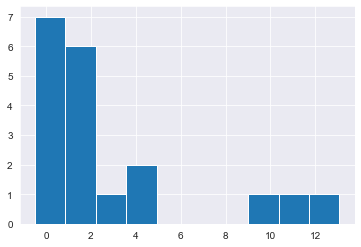

In [15]:
skew = (df.skew())
skew.hist()

## Violin Plots for Applied Features

In [16]:
# plotfeats= ["bedrooms", "bathrooms", 
#                "floors", "waterfront", "view", "condition", 
#                "grade"]


# catdata=df.loc[:, plotfeats]
# cat_values={}
# for n in plotfeats[1:len(plotfeats)]:
#     print(n)
#     print(pd.value_counts(catdata[n]))
#     ax = plt.subplots(figsize=(7, 2.5))
#     plt.xticks(rotation='vertical')
#     ax=sns.violinplot(x=n, y="price", data=df, linewidth=1)
#     plt.show()

## Price vs House Features  Bar Graphs
Exploring data by graphing all features vs price to see the relationship between price and each feature

In [17]:
CategoryAll = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", \
"floors", "waterfront", "view", "condition", "grade", "sqft_above", \
"sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long",\
"sqft_living15", "sqft_lot15"]
# fig, axes = plt.subplots(nrows=8,ncols=2, figsize=(16,8))

# for col, ax in zip(CategoryAll, axes.flatten()):
#     (df.groupby(col).mean()["price"].sort_values().plot.bar(ax=ax))
#     ax.set_title(col)
# fig.tight_layout()

Interpretation of the data:
    The data needs to be cleaned before further data exploration can be done. 
    1. price, sq ft living, sq ft above, sq ft lot, sq ft basement, yr built can be converted to category instead of a list of numbers.

Positive and negative skew can be observed. Closer the value is to 0, the less skew it is.

In [18]:

df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

## Unique Values
There are many features. Explore the data by looking and unique values. 

In [19]:
df.nunique(axis = 0, dropna = True)

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [20]:
category_unique=df.loc[:,((df.dtypes != 'object')&(df.nunique()>20))]

In [21]:
category_unique.head(5)

,id,price,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,1.00,1180,5650,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,2.25,2570,7242,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,1.00,770,10000,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,3.00,1960,5000,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,2.00,1680,8080,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [22]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df, columns=['zipcode'])
#dg = 

Create Plot for Unique values

In [23]:

# fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(16,16))
# categorical_columns = ["bedrooms", "bathrooms", "grade", "floors", "waterfront", "view", "condition"]
# for col, ax in zip(categorical_columns, axes.flatten()):
#     dg = df[['price', col]]
#     (dg.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax))
#     ax.scatter(x=df[col], y=df['price'], color='red')
#     ax.set_title(col)
# fig.tight_layout()
# plt.show()

## Create Bar Plots for Selected Category

In [24]:
# fig, axes = plt.subplots(nrows=5,ncols=1, figsize=(16,8))
# Category = ["bedrooms", "bathrooms", "floors", "condition", "grade"]

# for col, ax in zip(Category, axes.flatten()):
#     (df.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax))
#     ax.set_title(col)
# fig.tight_layout()

<span class="burk">Data does not seem to make sense for bathroom such as 0.75, 1.75, 2.75 ... for bathrooms</span>

In [25]:
data_pred = df.iloc[:,1:21]
data_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning 

### Check for Null values

In [26]:
# The column sqft_basement has question marks in it. I'm replacing them with
# np.nan, so that I can use the code below to replace the nan with the mean.
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].astype(np.float64)

In [27]:
def AreThereNullValues(df):
    print("Null values in the data?",df.isnull().values.any())
    print("How many?", df.isnull().sum().sum())
    
AreThereNullValues(df)

Null values in the data? True
How many? 6735


### Check for Columns with NaN values

In [28]:
def ColumnsWithNan(df):
    nan_values = df.isna()
    nan_columns = nan_values.any()
    return df.columns[nan_columns].tolist()

print("Columns with NaN:", ColumnsWithNan(df))

Columns with NaN: ['waterfront', 'view', 'sqft_basement', 'yr_renovated']


### Replace NaN with the mean

In [29]:
dfno_na = df.copy().dropna()
new_df = df.copy()
columns_with_nan = ColumnsWithNan(new_df)
#### Get means
dfno_na_means = dfno_na[columns_with_nan].mean()
dfno_na_means

for col in columns_with_nan:
    new_df[col] = new_df[col].fillna(dfno_na_means[col])
    
new_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [30]:
AreThereNullValues(new_df)

Null values in the data? False
How many? 0


### Convert Data Type from Floats to Integers

In [31]:

#new_df["id"].astype(int)
new_df["price"].astype(np.float64)
new_df["bedrooms"].astype(np.float64)
new_df["bathrooms"].astype(np.float64)
new_df["floors"].astype(np.float64)
new_df["waterfront"].astype(np.float64)
new_df["view"].astype(np.float64)
new_df["condition"].astype(np.float64)
new_df["grade"].astype(np.float64)
new_df["yr_built"].astype(int)
new_df['yr_renovated'].astype(int)
new_df["lat"].astype(int)
new_df["long"].astype(int)
new_df["date"].dtype
new_df["sqft_basement"].astype(np.float64)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Drop outliers for values > z_score with threadhold of 3

In [32]:
columns = new_df.columns.tolist()
for value in ["date", "id", "yr_built", "lat", "long", "yr_renovated", \
              "zipcode", "price", "view", "waterfront"]:
    columns.remove(value)

threshold = 3
df__ = new_df.copy()
df_ = df__[columns]
mean = np.mean(df_)
stdev = np.std(df_)
z_scores_abs = np.abs((df_ - mean)/stdev)
for col in columns:
   df__[col] = df__[col][z_scores_abs[col]<=3]

df__=df__.dropna()
AreThereNullValues(df__)

len(new_df), len(df__)

Null values in the data? False
How many? 0


(21597, 20357)

In [33]:
def remove_outliers(df, columns, threshold=3):
    """Removes rows of data in df whenever a zscore within that row is more 
       than `threshold`(default 3)"""
    threshold = 3
    dg = df.copy()
    df_ = dg[columns]
    mean = np.mean(df_)
    stdev = np.std(df_)
    z_scores_abs = np.abs((df_ - mean)/stdev)
    for col in columns:
        df_[col] = df_[col][z_scores_abs[col]<=3]
        df_ = df_[z_scores_abs < threshold]
    return dg.dropna()


In [34]:
columns = new_df.columns.tolist()
for value in ["date", "id", "yr_built", "lat", "long", "yr_renovated", \
              "zipcode", "price", "view", "waterfront"]:
    columns.remove(value)
print(columns)
new_df_no_outliers = new_df.copy()

new_df_no_outliers = remove_outliers(new_df_no_outliers, columns)

new_df_no_outliers.info()


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqf

## Create Dummy Variables

### Dummies for df

In [35]:
df_dummies = new_df_no_outliers.copy()
df_dummies.head()

#Create dummies for zipcode
df_dummies = pd.get_dummies(df_dummies, columns=['zipcode'])

In [36]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 90 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
zipcode_98001    21597 non-null uint8
zipcode_98002    21597 non-null uint8
zipcode_98003    21597 non-null uint

### Set Continous and Categorical 

In [37]:
# continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_lot15']
# categoricals = ['floors', 'waterfront', 'view', 'condition', 'grade']

### Continuous

In [38]:
# data_cont = new_df_no_outliers[continuous]

# # log features
# log_names = [f'{column}_log' for column in data_cont.columns]

# data_log = np.log(data_cont)
# data_log.columns = log_names

# # normalize (subract mean and divide by std)

# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# data_log_norm = data_log.apply(normalize)

# # one hot encode categoricals
# data_one = pd.get_dummies(df[categoricals]), #prefix=categoricals, drop_first=True)

# #housing_data = pd.concat([data_log_norm, data_one], axis=1)

In [39]:
# data_log_norm.info()

# Build Regression Model to Predict Prices with All the Data

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

## Linear Regression with Statsmodel

In [40]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 90 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
zipcode_98001    21597 non-null uint8
zipcode_98002    21597 non-null uint8
zipcode_98003    21597 non-null uint

In [41]:
# Using statsmodel data with NA removed

import statsmodels.api as sm

removefeats= ["price", "date", "grade", "lat", "long", "sqft_above", "sqft_basement", 'sqft_living15', 'sqft_lot15']
X = df_dummies.drop(removefeats, axis=1)
y = df_dummies['price']

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit_regularized(alpha=2000)
model.params

const            4.488385e+05
id              -2.617426e-07
bedrooms        -3.710439e+04
bathrooms        5.211065e+04
sqft_living      2.563296e+02
                     ...     
zipcode_98177    0.000000e+00
zipcode_98178    0.000000e+00
zipcode_98188    0.000000e+00
zipcode_98198   -8.607757e+03
zipcode_98199    6.738997e+04
Length: 82, dtype: float64

## Linear Regression with SK Learn

In [42]:
# Method 2- using sklearn

import sklearn
from sklearn import datasets, linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import Image, HTML

In [43]:
df_dummies['year_sold'] = pd.to_datetime(df_dummies['date'], format="%m/%d/%Y").dt.year
df_dummies['sqrt_price'] = np.sqrt(df_dummies['price'])
df_dummies['log_price'] = np.log(df_dummies['price'])
df_dummies['cube_root_price'] = (df_dummies['price'])**(1./3)
df_dummies.corr()['price'].head(20)

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264119
view             0.393744
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.322192
yr_built         0.053953
yr_renovated     0.118129
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
zipcode_98001   -0.091959
Name: price, dtype: float64

Index(['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zip

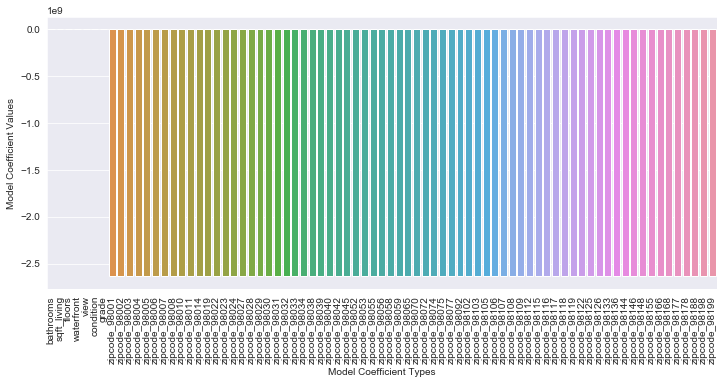

R squared:  0.8748736747687718
Average Coefficients:  2397100247.47077
Root Mean Squared Error:  5.140797110458601


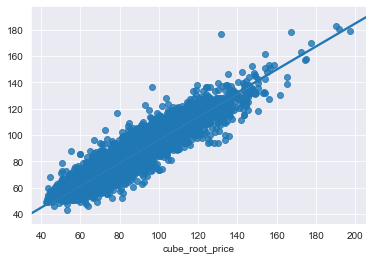

In [44]:
# continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',\
# 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_lot15']
# categoricals = ['floors', 'waterfront', 'view', 'condition', 'grade']
#. dfno_na. Use the dataframe with NaN removed
# df_fit = dfno_na
df_fit = df_dummies 

removefeats = [
 'id',
 'date',
 'bedrooms',
 'price',
 'log_price',
 'sqrt_price',
 'cube_root_price',
 #'bathrooms',
 #'floors',
 'sqft_lot',
 #'condition',
 'sqft_above',
 'sqft_basement',
 #'grade',
 'yr_built',
 'year_sold',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
              ]
X = df_fit.drop(removefeats, axis=1)
print(X.columns)
y_label = 'cube_root_price'
y = df_fit[y_label] #df_fit['price']
lr = linear_model.LinearRegression()
lr_model = lr.fit(X, y)
y_predict = lr_model.predict(X)
lr_r2 =  r2_score(y, y_predict)
bx=plt.subplots(figsize=(12,5))
bx= sns.barplot(x=0, y=1, data=pd.DataFrame(zip(X.columns, lr_model.coef_)))
plt.xticks(rotation='vertical')
plt.xlabel("Model Coefficient Types")
plt.ylabel("Model Coefficient Values")
plt.show()
y_pred = lr_model.predict(X)
print ("R squared: ", (lr_r2))
print ("Average Coefficients: ", (abs(lr_model.coef_).mean()))
print ("Root Mean Squared Error: ", sqrt(mean_squared_error(y, y_pred)))

ax = sns.regplot(y, y_pred)
    
plt.show()

# Train and Validate Model

## Setup Train/Test Data

In [45]:
from sklearn.model_selection import train_test_split
y

0        60.541396
1        81.331870
2        56.462162
3        84.530281
4        79.895697
           ...    
21592    71.137866
21593    73.680630
21594    73.809407
21595    73.680630
21596    68.753443
Name: cube_root_price, Length: 21597, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=40)
print(len(X_train), len(y_train), len(y_test), len(X_test))

14469 14469 7128 7128


In [47]:
X_train

,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
19057,2.50,2650,1.0,0.000000,0.0,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8785,1.50,1540,2.0,0.000000,0.0,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8174,1.75,1270,1.5,0.000000,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845,3.50,3010,2.0,0.000000,0.0,3,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8451,1.75,1010,1.0,0.000000,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,1.75,2500,1.0,0.000000,0.0,4,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16065,2.50,2960,2.0,0.007518,0.0,3,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14501,1.00,1270,1.0,0.000000,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14555,1.00,1400,1.5,0.000000,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and predict

In [48]:
#fit a model: X_train, X_test, y_train, y_test

lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

### Calculate Predictions on Training and Test Sets

In [49]:
y_hat_train = lr_model.predict(X_train)
y_hat_test = lr_model.predict(X_test)

### Calculate Training and Test Residuals

In [50]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### Calculate the Mean Square Error (MSE)

In [51]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print ("Average Coefficients: ", (abs(lr_model.coef_).mean()))



Train Mean Squared Error: 26.64815293423577
Test Mean Squared Error: 26.15409936319339
Average Coefficients:  2611596384.7960644


## Evaluate the Effect of Train-Test Split Size

In [52]:
import random
random.seed(1)

In [53]:
train_err = []
test_err = []
t_sizes = list(range(20, 460, ))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/500.)
    lr.fit(X_train, y_train)
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))


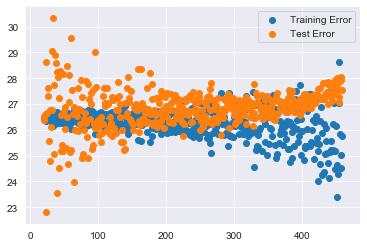

In [54]:
# Plot:
plt.scatter(t_sizes, train_err, label="Training Error")
plt.scatter(t_sizes, test_err, label="Test Error")
plt.legend()

## Evaluate the Effect of Train_test Split Size: Extension

In [55]:
X_train

,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2996,1.75,1650,1.0,0.0,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10861,2.50,1580,2.0,0.0,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5882,2.50,2660,1.0,0.0,0.0,4,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151,1.00,1110,1.5,0.0,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21575,2.75,2770,2.0,0.0,0.0,3,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,2.50,1930,1.0,0.0,0.0,4,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13718,1.75,1740,1.0,0.0,0.0,5,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7355,2.00,1640,1.0,0.0,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18192,3.25,5570,2.0,0.0,0.0,5,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
random.seed(5)

train_err = []
test_err = []
t_sizes = list(range(5, 100, 5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split
        lr.fit(X_train, y_train)
        y_hat_train = lr.predict(X_train)
        y_hat_test = lr.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))


TypeError: 'function' object is not iterable

In [57]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 2996 to 2738
Data columns (total 77 columns):
bathrooms        1770 non-null float64
sqft_living      1770 non-null int64
floors           1770 non-null float64
waterfront       1770 non-null float64
view             1770 non-null float64
condition        1770 non-null int64
grade            1770 non-null int64
zipcode_98001    1770 non-null uint8
zipcode_98002    1770 non-null uint8
zipcode_98003    1770 non-null uint8
zipcode_98004    1770 non-null uint8
zipcode_98005    1770 non-null uint8
zipcode_98006    1770 non-null uint8
zipcode_98007    1770 non-null uint8
zipcode_98008    1770 non-null uint8
zipcode_98010    1770 non-null uint8
zipcode_98011    1770 non-null uint8
zipcode_98014    1770 non-null uint8
zipcode_98019    1770 non-null uint8
zipcode_98022    1770 non-null uint8
zipcode_98023    1770 non-null uint8
zipcode_98024    1770 non-null uint8
zipcode_98027    1770 non-null uint8
zipcode_98028    1770 non-null 

## Evaluation of the Train Data

## Evaluation of the Test Data

Index(['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zip

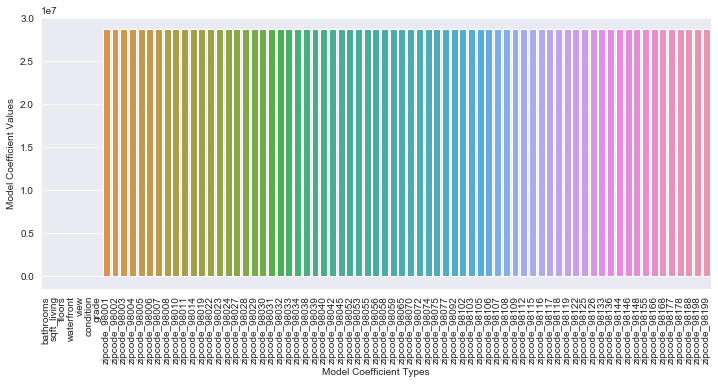

R squared from test data:  -26.205712339657264
Average Coefficients:  26128974.00458141
Root Mean Squared Error:  75.81128872572604


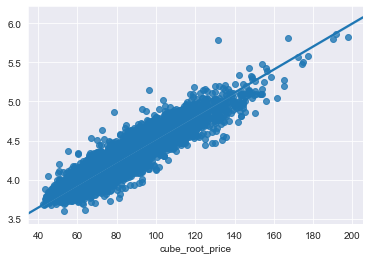

In [58]:
# continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',\
# 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_lot15']
# categoricals = ['floors', 'waterfront', 'view', 'condition', 'grade']
#. dfno_na. Use the dataframe with NaN removed
# df_fit = dfno_na

df_fit = df_dummies 

removefeats = []
X_train_ = X_train.drop(removefeats, axis=1)
X_test_ = X_test.drop(removefeats, axis=1)
print(X_train_.columns)
# take the cube root because the data is not linear.
y_train_cube_root = y_train**(0.33)
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train_, y_train_cube_root)
y_predict = lr_model.predict(X_test_)
lr_r2 =  r2_score(y_test, y_predict)
bx=plt.subplots(figsize=(12,5))
bx= sns.barplot(x=0, y=1, data=pd.DataFrame(zip(X_train_.columns, \
                                                lr_model.coef_)))
plt.xticks(rotation='vertical')
plt.xlabel("Model Coefficient Types")
plt.ylabel("Model Coefficient Values")
plt.show()
y_pred = lr_model.predict(X_test_)
print ("R squared from test data: ", (lr_r2))
print ("Average Coefficients: ", (abs(lr_model.coef_).mean()))
print ("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_pred)))

ax = sns.regplot(y_test, y_pred)
    
plt.show()

In [59]:
x_cols

NameError: name 'x_cols' is not defined

In [60]:
from statsmodels.formula.api import ols
#fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = df).fit()
model.summary

#initial refinement 
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', \
          'condition', 'grade']
predictors = outcome + '~' + predictors
model = ols(formula=formula, data = df_fit).fit
model.summary()

NameError: name 'x_cols' is not defined

### Evaluating estimator performance

In [61]:
from sklearn.metrics import make_scorer
from sklearn import datasets
from sklearn import svm

#scoring =

In [62]:
X.shape

(21597, 77)

In [63]:
# Convert y from Pandas Series to Pandas DataFrame
y.to_frame()

,cube_root_price
0,60.541396
1,81.331870
2,56.462162
3,84.530281
4,79.895697
...,...
21592,71.137866
21593,73.680630
21594,73.809407
21595,73.680630


In [64]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.scores(X_test, y_test)

ValueError: Unknown label type: 'continuous'

# Recommendations for First-Time Home Buyers

In [91]:
df_dummies.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,year_sold,sqrt_price,log_price,cube_root_price
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007587,0.233848,3.409825,...,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678,2014.322962,706.427735,13.048211,78.666966
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081909,0.764569,0.650546,...,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263,0.467619,203.121487,0.526555,14.533365
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,279.284801,11.264464,42.726587
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,567.450438,12.682307,68.541240
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,670.820393,13.017003,76.630943
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,803.118920,13.377006,86.401226
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,2774.887385,15.856731,197.468082


In [94]:
# Separate price into 3 catogories: Low, Medium and High

Price_Ranges = pd.qcut(x=df_dummies['price'], bins = 3#[0, 322000, 450000, 645000, 7700000])

Price_Ranges.value_counts()

# Plotting Price with Lat and Long 


(322000, 450000]     5445
(0, 322000]          5406
(450000, 645000]     5375
(645000, 7700000]    5371
Name: price, dtype: int64

In [149]:
Price_Ranges.

0             (0, 322000]
1        (450000, 645000]
2             (0, 322000]
3        (450000, 645000]
4        (450000, 645000]
               ...       
21592    (322000, 450000]
21593    (322000, 450000]
21594    (322000, 450000]
21595    (322000, 450000]
21596    (322000, 450000]
Name: price, Length: 21597, dtype: category
Categories (4, interval[int64]): [(0, 322000] < (322000, 450000] < (450000, 645000] < (645000, 7700000]]

In [151]:
x= 5445+5406+5375+5371
x

21597

In [67]:
# Price vs Zipcode


# plt.figure(figsize = (8, 10))
# sns.scatterplot(x='long', y='lat', data = df)
# plt.title("Lat & Long: Sale price index by color")
# plt.legend(fancybox = True)

In [ ]:
# Price vs sqft_living

In [ ]:
# Price vs bathrooms

In [ ]:
# Price vs view

In [ ]:
# Price vs condition

In [ ]:
# Price vs floors

In [ ]:
# Price vs grade

# King County Map

No handles with labels found to put in legend.


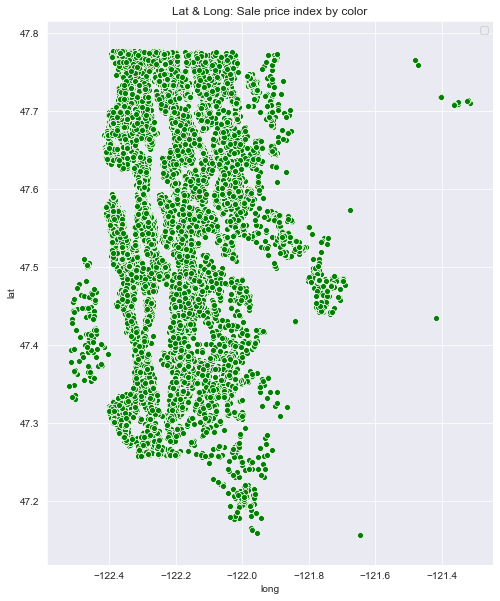

In [120]:
plt.figure(figsize = (8, 10))
sns.scatterplot(x=df['long'], y=df['lat'], color='g')
plt.title("Lat & Long: Sale price index by color")
plt.legend(fancybox = True)

In [186]:

def color(price):
    low = 500000
    high = 1000000
    if price < low:
        return "blue"
    elif price < high:
        return "green"
    else:
        return "red"
colors = df['price'].apply(color)



# df_low = df[df['price'] < low]
# df_med = df[((df['price'] >= low) & (df['price'] < high))]
# df_high = df[df['price']>= high]

# df_low.plot(kind='scatter', x='long', y='lat', c='blue', alpha=0.4)
# df_med.plot(kind='scatter', x='long', y='lat', c='green', alpha=0.4)
# df_high.plot(kind='scatter', x='long', y='lat', c='red', alpha=0.4)
# plt.show()

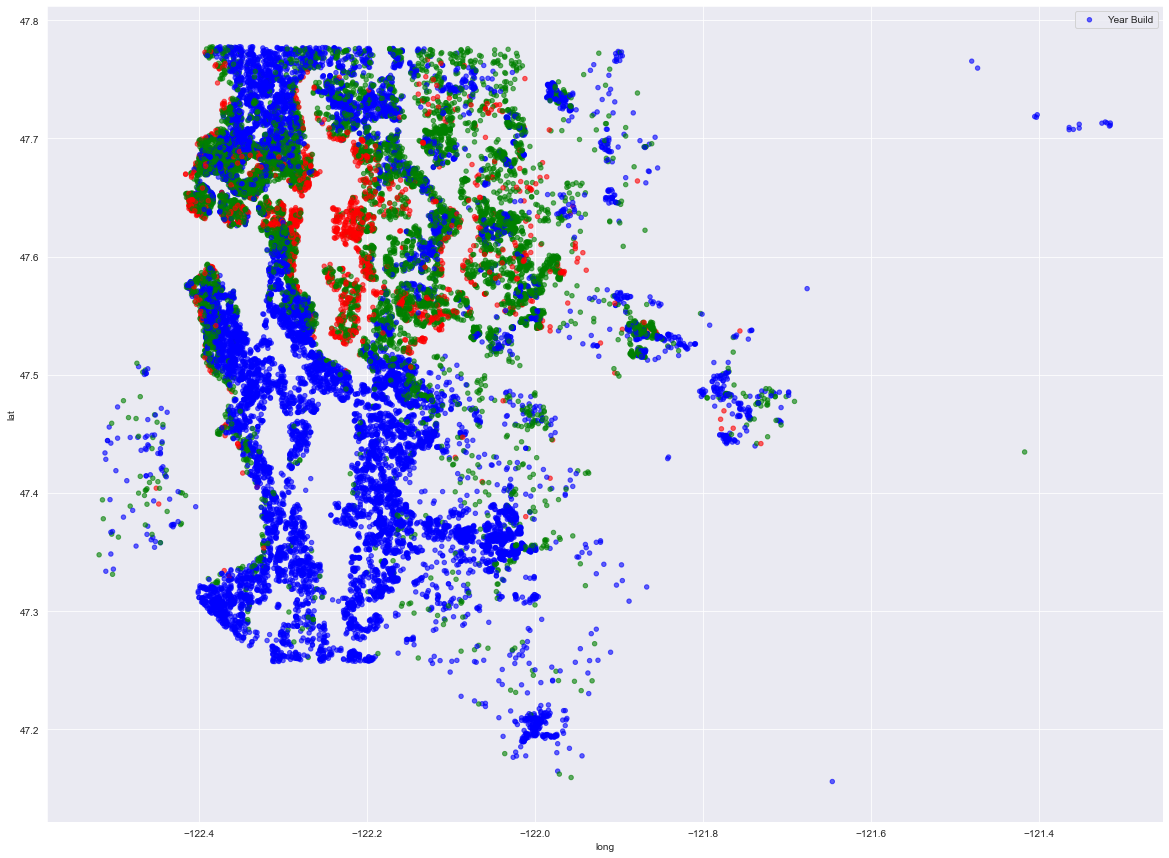

In [187]:
# Attempt to graph king county map with price

map_plot = df_dummies.plot(kind="scatter", x='long', y='lat', alpha=0.6,\
                          s=df_dummies['yr_built']/100, label="Year Build",\
                          c=df_dummies['price'].apply(color), cmap=plt.get_cmap('jet'),\
                          colorbar=False, figsize=(20,15))
plt.legend()


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [ ]:
# another attempt to graph map with price
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
         s=housing4train['population']/100, label='population',   # set symbol size on population
         c=housing4train['median_house_value'],                  #  set symbol color on house value    
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,7))
plt.legend()